In [16]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive

In [17]:
# Mounting Google Drive to access data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np

# Read data from CSV file
csv_file_path = "/content/drive/MyDrive/OS_Project/test_codes/optimal_node_data_Test3.csv"
df = pd.read_csv(csv_file_path)

# Specify the metric columns
metrics = ["CPU Load (%)", "Memory Usage (%)", "Battery Level (%)", "Load Average"]

# Normalize Metrics (Min-Max Scaling to avoid negative values)
df[metrics] = (df[metrics] - df[metrics].min()) / (df[metrics].max() - df[metrics].min())

# Group by Node_ID
grouped = df.groupby("Node_ID")

# Calculate Uniformity Metrics
uniformity_scores = {}
for node, group in grouped:
    mean_values = group[metrics].mean()  # Mean for each metric
    std_values = group[metrics].std()   # Standard deviation for each metric

    # Calculate Coefficient of Variation (CV) for each metric
    cv_values = (std_values / mean_values).replace(np.inf, 0).fillna(0)

    # Clamp CV to avoid extreme values
    cv_values = cv_values.clip(lower=-10, upper=10)

    # Average CV across all metrics for this node
    uniformity_score = cv_values.mean()
    uniformity_scores[node] = uniformity_score

# Overall Uniformity Score (Optionally Weighted by Row Count)
overall_uniformity_score = np.mean(list(uniformity_scores.values()))

# Output Results
print("Uniformity Scores by Node:")
for node, score in uniformity_scores.items():
    print(f"{node}: {score:.4f}")

print(f"\nOverall Uniformity Score: {overall_uniformity_score:.4f}")



Uniformity Scores by Node:
node_0: 1.1532
node_1: 0.0000
node_11: 0.7625
node_12: 0.9039
node_13: 0.0000
node_14: 0.1323
node_15: 0.8234
node_16: 0.1592
node_17: 0.5230
node_18: 0.8032
node_19: 0.1323
node_2: 0.2963
node_20: 0.6307
node_3: 0.8213
node_4: 0.5172
node_5: 1.1222
node_6: 0.2528
node_7: 0.7687
node_8: 0.6440

Overall Uniformity Score: 0.5498


Dataset Summary:
       optimal_score  CPU Load (%)  Memory Usage (%)  Battery Level (%)  \
count     533.000000    533.000000        533.000000         533.000000   
mean        0.014139     19.158912         63.589493          71.596623   
std         0.004381      8.490555          0.948070           2.485399   
min         0.005800     10.700000         62.000000          67.000000   
25%         0.010081     12.600000         63.099998          69.000000   
50%         0.014535     16.200001         63.500000          72.000000   
75%         0.018382     23.799999         64.300003          74.000000   
max         0.021368     42.099998         65.900002          75.000000   

       Load Average  
count    533.000000  
mean       2.861462  
std        2.664408  
min        1.194824  
25%        1.582031  
50%        1.955566  
75%        2.601562  
max       11.678711  

Variance of Metrics per Node:
         CPU Load (%)  Memory Usage (%)  Battery Level (%)  Load Average
Node_

<Figure size 1000x600 with 0 Axes>

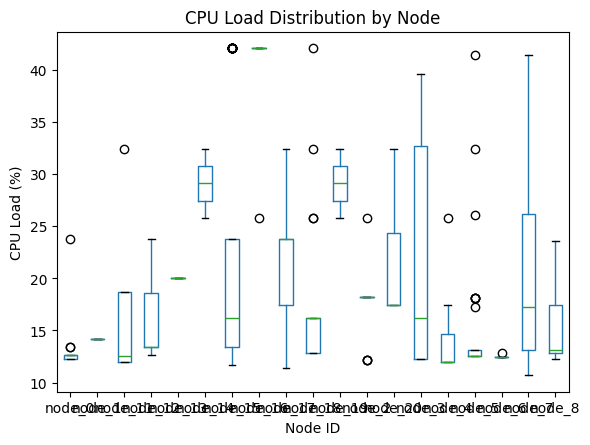

<Figure size 1000x600 with 0 Axes>

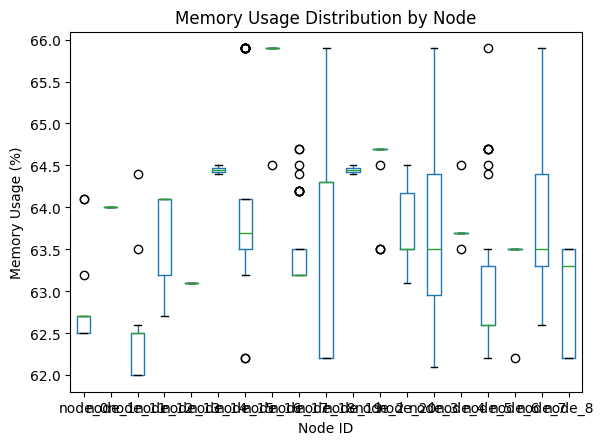

<Figure size 1000x600 with 0 Axes>

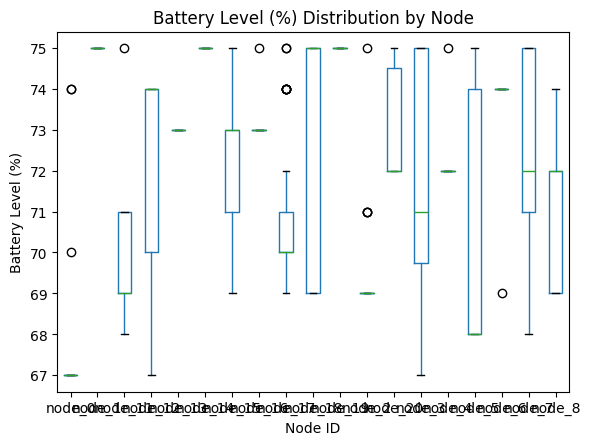

<Figure size 1000x600 with 0 Axes>

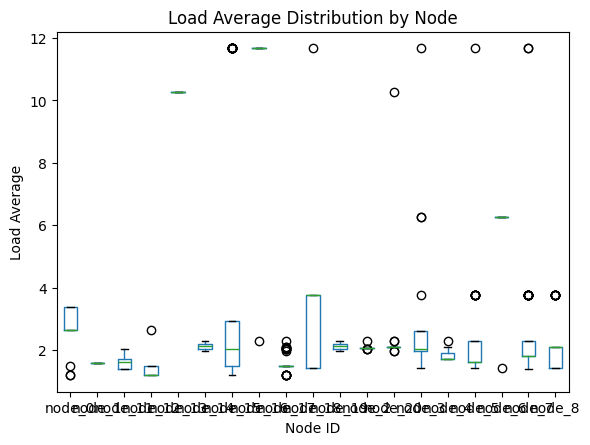

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/OS_Project/test_codes/optimal_node_data_Test3.csv')

# Summarize data
print("Dataset Summary:")
print(df.describe())

# Group data by Node ID
grouped = df.groupby('Node_ID').mean()

# Compute Variance for Metrics
variance_metrics = df.groupby('Node_ID')[['CPU Load (%)', 'Memory Usage (%)', 'Battery Level (%)', 'Load Average']].var()
print("\nVariance of Metrics per Node:")
print(variance_metrics)

# Calculate uniformity using entropy
from scipy.stats import entropy

def calculate_uniformity(df, column):
    counts = df[column].value_counts()
    return entropy(counts)

uniformity = calculate_uniformity(df, 'Node_ID')
print(f"\nUniformity (Entropy) of Node Assignment: {uniformity:.4f}")

# Visualize CPU Load distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='CPU Load (%)', by='Node_ID', grid=False)
plt.title('CPU Load Distribution by Node')
plt.suptitle('')
plt.xlabel('Node ID')
plt.ylabel('CPU Load (%)')
plt.show()

# Visualize CPU Load distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='Memory Usage (%)', by='Node_ID', grid=False)
plt.title('Memory Usage Distribution by Node')
plt.suptitle('')
plt.xlabel('Node ID')
plt.ylabel('Memory Usage (%)')
plt.show()

# Visualize CPU Load distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='Battery Level (%)', by='Node_ID', grid=False)
plt.title('Battery Level (%) Distribution by Node')
plt.suptitle('')
plt.xlabel('Node ID')
plt.ylabel('Battery Level (%)')
plt.show()

# Visualize CPU Load distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='Load Average', by='Node_ID', grid=False)
plt.title('Load Average Distribution by Node')
plt.suptitle('')
plt.xlabel('Node ID')
plt.ylabel('Load Average')
plt.show()

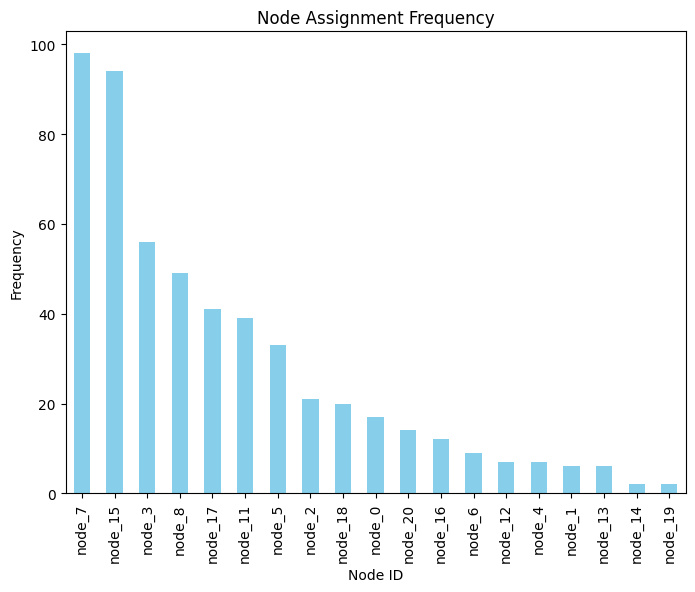


Node Assignment Frequency:
Node_ID
node_7     98
node_15    94
node_3     56
node_8     49
node_17    41
node_11    39
node_5     33
node_2     21
node_18    20
node_0     17
node_20    14
node_16    12
node_6      9
node_12     7
node_4      7
node_1      6
node_13     6
node_14     2
node_19     2
Name: count, dtype: int64


In [20]:
# Calculate node assignment frequency
node_counts = df['Node_ID'].value_counts()

# Visualize node assignment frequency
node_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Node Assignment Frequency')
plt.xlabel('Node ID')
plt.ylabel('Frequency')
plt.show()

print("\nNode Assignment Frequency:")
print(node_counts)


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data from CSV
file_path = '/content/drive/MyDrive/OS_Project/test_codes/optimal_node_data_Test3.csv'
df = pd.read_csv(file_path)

# Set the node names as the index
df.set_index("Node_ID", inplace=True)

# Drop non-metric columns if present
df = df.drop(columns=['optimal_score'], errors='ignore')

# Standardize Metrics
scaler = StandardScaler()
standardized_metrics = scaler.fit_transform(df)

# Compute Pairwise Euclidean Distances
num_nodes = len(df)
distances = np.zeros((num_nodes, num_nodes))

for i in range(num_nodes):
    for j in range(num_nodes):
        distances[i, j] = np.linalg.norm(standardized_metrics[i] - standardized_metrics[j])

# Aggregate Distances and Compute Variance-Based Uniformity Score
uniformity_score = np.var(distances)  # Variance-based uniformity score

# Output Results
print("Pairwise Distances Matrix:")
print(pd.DataFrame(distances, index=df.index, columns=df.index))
print("\nUniformity Score (lower is better):", uniformity_score)


Pairwise Distances Matrix:
Node_ID    node_3    node_3    node_3    node_3    node_3    node_3    node_3  \
Node_ID                                                                         
node_3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
node_3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
node_3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
node_3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
node_3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
node_3   4.271598  4.271598  4.271598  4.271598  4.271598  4.271598  4.271598   
node_3   4.271598  4.271598  4.271598  4.271598  4.271598  4.271598  4.271598   
node_3   4.271598  4.271598  4.271598  4.271598  4.271598  4.271598  4.271598   
node_3   4.271598  4.271598  4.271598  4.271598  4.271598  4.271598  4.271598   
n